In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from regprepare import get_auto_mpg, train_val_test
from scipy.stats import pearsonr, spearmanr
from scipy.stats import ttest_1samp
from scipy import stats

In [7]:
df = get_auto_mpg()
df

,mpg,cylinders,displ,horsepower,weight,acc,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,"""ford mustang gl"""
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,"""vw pickup"""
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,"""dodge rampage"""
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,"""ford ranger"""


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         392 non-null    float64
 1   cylinders   392 non-null    int64  
 2   displ       392 non-null    float64
 3   horsepower  392 non-null    float64
 4   weight      392 non-null    float64
 5   acc         392 non-null    float64
 6   model_year  392 non-null    int64  
 7   origin      392 non-null    int64  
 8   name        392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


In [11]:
cont_var = ['mpg', 'displ', 'horsepower', 'weight', 'acc']

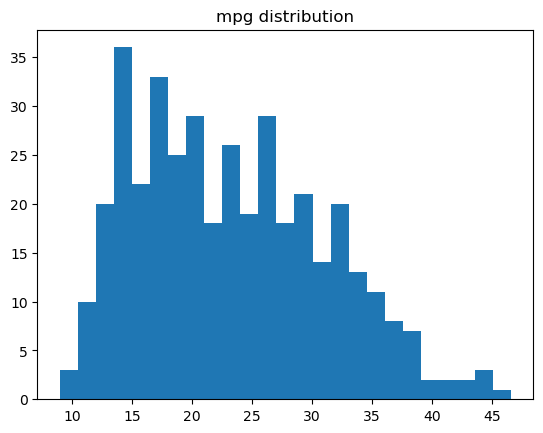

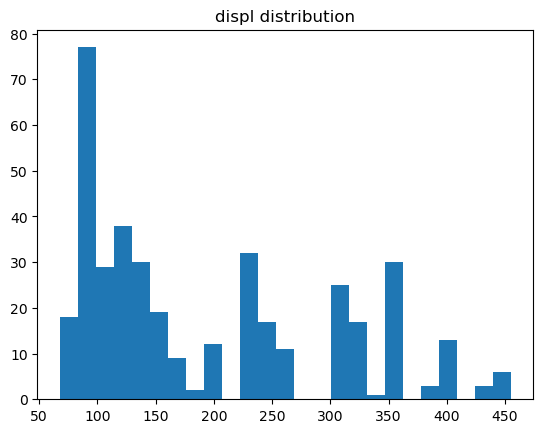

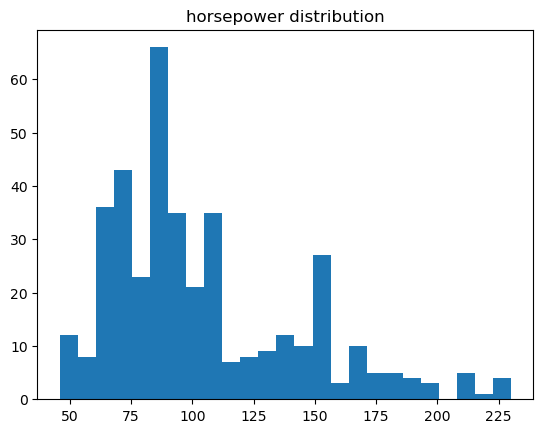

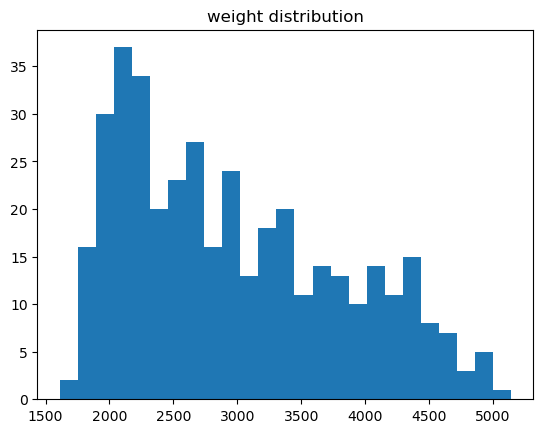

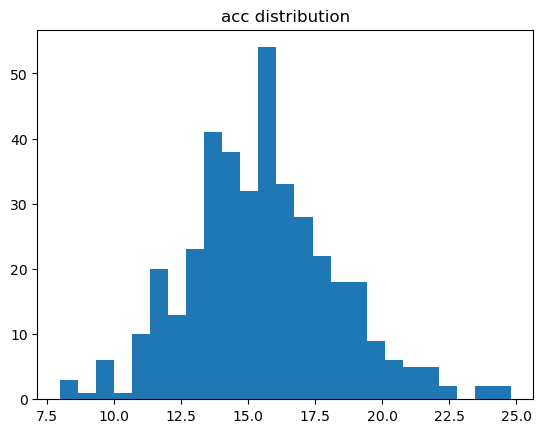

In [13]:
for col in cont_var:
    
    plt.hist(df[col], bins = 25)
    plt.title(f'{col} distribution')
    plt.show()

Acceleration and mpg are the most normally distributed of the columns.
Displacement, weight and horsepower are not

In [15]:
df['name'].nunique()

301

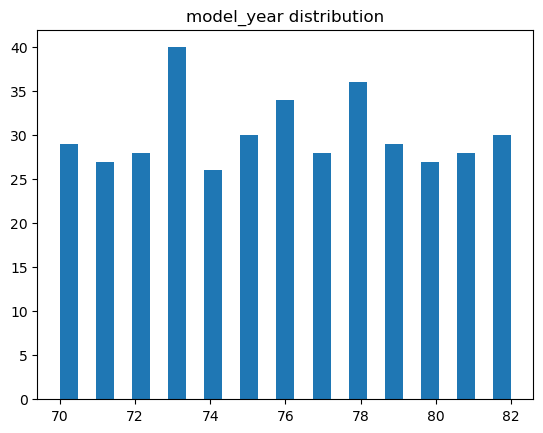

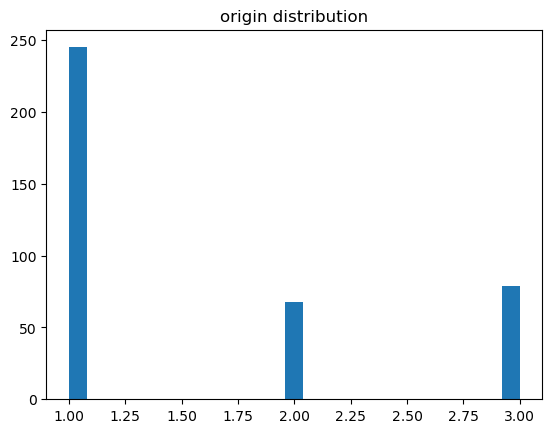

In [16]:
for col in ['model_year', 'origin']:
    
    plt.hist(df[col], bins =25)
    plt.title(f'{col} distribution')
    plt.show()         

For the discrete colum. of model year, distribution is relatively uniform from 1970 to 1982
For the discrete column origin, distribution is skewed, with significantly more cars at origin 1
Going forward we will prefer the Spearman R test because much of the data is not normally distributed

# Bivariate Distribution

## Continuous with Continuous

- sns.pairplot
- sns.relplot
- sns.lmplot
- sns.joinplot
- sns.heatmap

In [17]:
train, val, test = train_val_test(df)

In [19]:
train[cont_var]

,mpg,displ,horsepower,weight,acc
212,16.5,350.0,180.0,4380.0,12.1
346,32.3,97.0,67.0,2065.0,17.8
325,44.3,90.0,48.0,2085.0,21.7
90,12.0,429.0,198.0,4952.0,11.5
246,32.8,78.0,52.0,1985.0,19.4
...,...,...,...,...,...
72,15.0,304.0,150.0,3892.0,12.5
107,18.0,232.0,100.0,2789.0,15.0
272,23.8,151.0,85.0,2855.0,17.6
352,29.9,98.0,65.0,2380.0,20.7


In [20]:
train_corr = df[cont_var].corr(method = 'spearman')
train_corr

,mpg,displ,horsepower,weight,acc
mpg,1.000000,-0.855234,-0.853616,-0.875585,0.441539
displ,-0.855234,1.000000,0.876171,0.945630,-0.499403
horsepower,-0.853616,0.876171,1.000000,0.878819,-0.658142
weight,-0.875585,0.945630,0.878819,1.000000,-0.405109
acc,0.441539,-0.499403,-0.658142,-0.405109,1.000000


<AxesSubplot:>

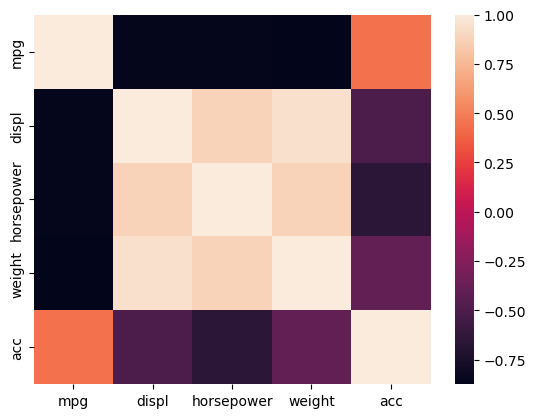

In [21]:
sns.heatmap(train_corr)

Displacement horsepower and weight strong neg corr with mpg
Accel and mpg have moderate positive corr
Strong pos corr with displacment horsepower and weight
Moderate neg corr with accel and dis horse and weight

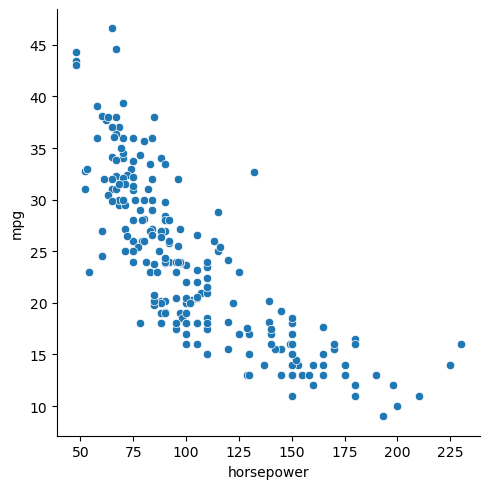

In [22]:
sns.relplot(x = 'horsepower',  y= 'mpg', data = train)

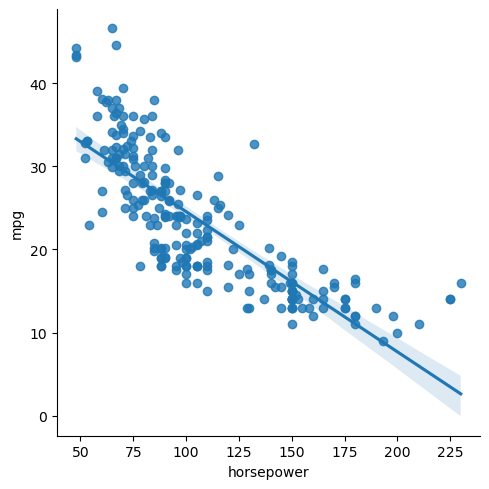

In [23]:
sns.lmplot(x = 'horsepower', y = 'mpg', data = train)

## Discrete with Continuous

- sns.swarmplot
- sns.stripplot
- sns.boxplot
- sns.violinplot
- sns.barplot

<AxesSubplot:xlabel='origin', ylabel='mpg'>

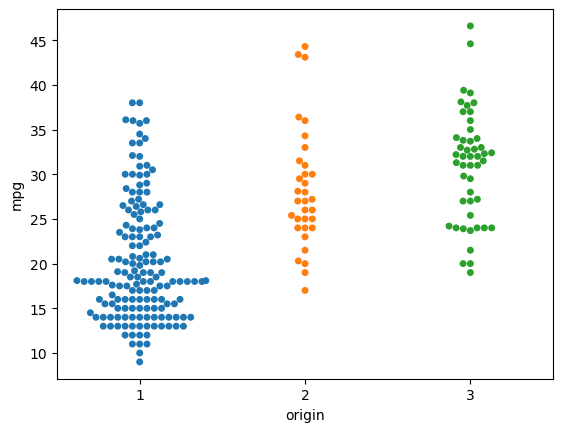

In [24]:
sns.swarmplot(x = 'origin', y= 'mpg', data = train)

Origin 1 appears to make cars with lower mpg. I would use a one-sample t-test to compare mpg of origin 1 cars to the overall mean in the dataset

Could even 1 tail this to ask if it lowers overall mpg

Null hypothesis: mpg for origin 1 cars is greater than or equal to the overall average in the train dataset

Alternative hypothesis: The mpg for origin 1 cars is less than the overall mean

In [31]:
t, p = stats.ttest_1samp(train[train['origin'] == 1]['mpg'], train['mpg'].mean())

In [33]:
alpha = .05

if t < 0 and p/2 < alpha:
    print('Reject null hypothesis')
else:
    print('Do not reject null hypothesis')

Reject null hypothesis


The average mpg for origin 1 cars is less than overall mean